In [2]:
import numpy as np
from pathlib import Path
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Set paths
# -----------------------------
dataset_dir = Path("D:/VidSense/data/dataset")
model_path  = Path("D:/VidSense/models/cnn_lstm_best.h5")

In [3]:
# Load test dataset
X_test = np.load(dataset_dir / "X_test.npy")
y_test = np.load(dataset_dir / "y_test.npy")

print("✔ Test data loaded:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

✔ Test data loaded:
X_test: (3, 12, 512)
y_test: (3,)


In [4]:
# Load trained model
#
model = load_model(model_path)
print("✔ Model loaded from:", model_path)

✔ Model loaded from: D:\VidSense\models\cnn_lstm_best.h5


In [7]:
 #Make predictions

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("Predictions done. Sample:", y_pred[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predictions done. Sample: [2 2 0]


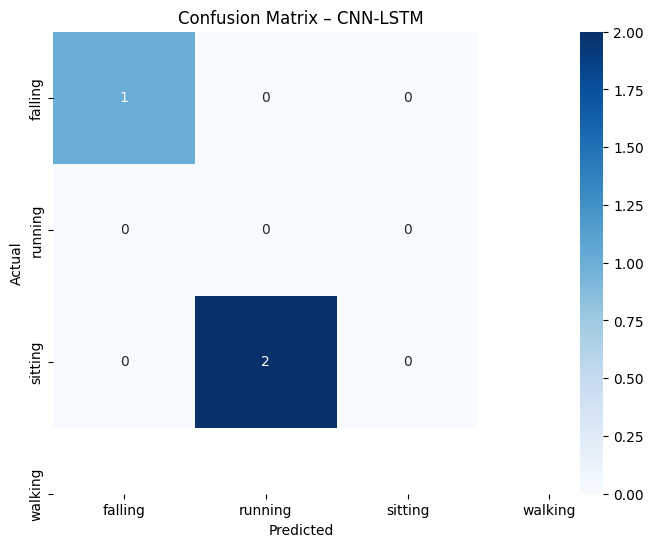

In [8]:
# confusion matrix

labels = sorted([d.name for d in Path("D:/VidSense/data/features").iterdir() if d.is_dir()])

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – CNN-LSTM")
plt.show()

In [11]:
# Get unique classes in your test set
unique_classes = np.unique(y_test)

# Map to label names
label_names_test = [labels[i] for i in unique_classes]
report = classification_report(
    y_test,
    y_pred,
    labels=unique_classes,
    target_names=label_names_test
)

print("✔ Classification Report:\n")
print(report)


✔ Classification Report:

              precision    recall  f1-score   support

     falling       1.00      1.00      1.00         1
     walking       0.00      0.00      0.00         2

   micro avg       1.00      0.33      0.50         3
   macro avg       0.50      0.50      0.50         3
weighted avg       0.33      0.33      0.33         3



C:\Users\Rajit\anaconda3\envs\vidsense_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Rajit\anaconda3\envs\vidsense_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Rajit\anaconda3\envs\vidsense_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize